In [72]:
import pandas as pd #used for working with dataframes—our dataset
import numpy as np #used to manipulate arrays
import matplotlib.pyplot as plt #for making visuals
import seaborn as sns #for making visuals too
import json

In [1]:
traina=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\train_trendency.csv")
trainb=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\train_vaccine.csv")
sub=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\Result_Quadratic.csv") #meaning submission results
traina.info()

NameError: name 'pd' is not defined

Text(0.5, 1.0, 'Georgia, Deaths')

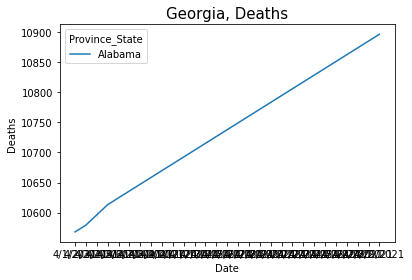

In [74]:
sns.lineplot(data=sub[sub["Province_State"]=="Alabama"],
            x="Date",
            y="Deaths",
            hue="Province_State")
plt.title('Georgia, Deaths', fontsize=15)

In [75]:
sub[sub["Province_State"]=="Alabama"]

,ID,Confirmed,Deaths,Province_State,Date
0,0,515931.6667,10568.06667,Alabama,4/1/2021
50,50,516347.4788,10579.36970,Alabama,4/2/2021
100,100,516763.2909,10590.67273,Alabama,4/3/2021
150,150,517179.1030,10601.97576,Alabama,4/3/2021
200,200,517594.9152,10613.27879,Alabama,4/4/2021
250,250,518010.7273,10624.58182,Alabama,4/5/2021
300,300,518426.5394,10635.88485,Alabama,4/6/2021
350,350,518842.3515,10647.18788,Alabama,4/7/2021
400,400,519258.1636,10658.49091,Alabama,4/8/2021
450,450,519673.9758,10669.79394,Alabama,4/9/2021


In [76]:
#standardize datatype and label as Training data
traina["Date"]=pd.to_datetime(traina["Date"])
traina["Test"]="Train"
traina

,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Test
0,0,Alabama,2021-01-12,407848,5573,211684.0,190591.0,8318.021857,1981019.0,1.366440,40402.697430,Train
1,1,Alaska,2021-01-12,50544,225,7165.0,43132.0,6906.205360,1357708.0,0.445351,185594.597735,Train
2,2,Arizona,2021-01-12,636100,10482,86757.0,538861.0,8739.177523,5742443.0,1.647854,42806.225328,Train
3,3,Arkansas,2021-01-12,259553,4121,229700.0,25732.0,8600.724235,2208736.0,1.587730,73190.174047,Train
4,4,California,2021-01-12,2832085,31345,NaN,2773506.0,7098.216165,36508384.0,1.110900,92397.696784,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
3945,3945,Virginia,2021-03-31,618976,10252,NaN,NaN,7251.767584,6466133.0,1.656284,75755.592601,Train
3946,3946,Washington,2021-03-31,364486,5247,NaN,NaN,4786.488792,5890924.0,1.439561,77360.561731,Train
3947,3947,West Virginia,2021-03-31,141738,2676,NaN,NaN,7908.837835,2468123.0,1.887991,137718.780881,Train
3948,3948,Wisconsin,2021-03-31,636041,7315,NaN,NaN,10923.970972,7585402.0,1.150083,130278.883367,Train


In [77]:
#standardize datatype and label as our Guess/Submission data
sub["Date"]=pd.to_datetime(sub["Date"])
sub["Date"]=sub["Date"].dt.floor('d')
sub["Test"]="Guess"
sub

,ID,Confirmed,Deaths,Province_State,Date,Test
0,0,5.159317e+05,10568.066670,Alabama,2021-04-01,Guess
1,1,6.297940e+04,313.800000,Alaska,2021-04-01,Guess
2,2,8.421711e+05,16998.800000,Arizona,2021-04-01,Guess
3,3,3.306241e+05,5633.466667,Arkansas,2021-04-01,Guess
4,4,3.671564e+06,59580.266670,California,2021-04-01,Guess
...,...,...,...,...,...,...
1495,1495,6.646119e+05,10685.072730,Virginia,2021-04-30,Guess
1496,1496,3.928481e+05,5440.000000,Washington,2021-04-30,Guess
1497,1497,1.542541e+05,2818.218182,West Virginia,2021-04-30,Guess
1498,1498,6.575193e+05,7508.200000,Wisconsin,2021-04-30,Guess


In [78]:
alla=traina.append(sub) #merging training data with submission data, removing unnecessary columns
states=alla["Province_State"].unique()
alla=alla.drop(columns=['Recovered', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'ID'])
print(alla["Province_State"].unique())
alla
#We now got to filter by each state, there was probably an easier way to do this, but I just manually did it

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Test
0,0.0,Alabama,2021-01-12,4.078480e+05,5573.000000,Train
1,1.0,Alaska,2021-01-12,5.054400e+04,225.000000,Train
2,2.0,Arizona,2021-01-12,6.361000e+05,10482.000000,Train
3,3.0,Arkansas,2021-01-12,2.595530e+05,4121.000000,Train
4,4.0,California,2021-01-12,2.832085e+06,31345.000000,Train
...,...,...,...,...,...,...
1495,NaN,Virginia,2021-04-30,6.646119e+05,10685.072730,Guess
1496,NaN,Washington,2021-04-30,3.928481e+05,5440.000000,Guess
1497,NaN,West Virginia,2021-04-30,1.542541e+05,2818.218182,Guess
1498,NaN,Wisconsin,2021-04-30,6.575193e+05,7508.200000,Guess


In [79]:
Wyoming=alla[alla["Province_State"]=="Wyoming"]


In [80]:
Wisconsin=alla[alla["Province_State"]=="Wisconsin"]


In [81]:
West_Virginia=alla[alla["Province_State"]=="West Virginia"]


In [82]:
Washington=alla[alla["Province_State"]=="Washington"]


In [83]:
Virginia=alla[alla["Province_State"]=="Virginia"]


In [84]:
Vermont=alla[alla["Province_State"]=="Vermont"]


In [85]:
Utah=alla[alla["Province_State"]=="Utah"]


In [86]:
Texas=alla[alla["Province_State"]=="Texas"]


In [87]:
Tennessee=alla[alla["Province_State"]=="Tennessee"]


In [88]:
South_Dakota=alla[alla["Province_State"]=="South Dakota"]


In [89]:
South_Carolina=alla[alla["Province_State"]=="South Carolina"]


In [90]:
Rhode_Island=alla[alla["Province_State"]=="Rhode Island"]


In [91]:
Pennsylvania=alla[alla["Province_State"]=="Pennsylvania"]


In [92]:
Oregon=alla[alla["Province_State"]=="Oregon"]


In [93]:
Oklahoma=alla[alla["Province_State"]=="Oklahoma"]


In [94]:
Ohio=alla[alla["Province_State"]=="Ohio"]


In [95]:
North_Dakota=alla[alla["Province_State"]=="North Dakota"]


In [96]:
North_Carolina=alla[alla["Province_State"]=="North Carolina"]


In [97]:
New_York=alla[alla["Province_State"]=="New York"]


In [98]:
New_Mexico=alla[alla["Province_State"]=="New Mexico"]


In [99]:
New_Jersey=alla[alla["Province_State"]=="New Jersey"]


In [100]:
New_Hampshire=alla[alla["Province_State"]=="New Hampshire"]


In [101]:
Nevada=alla[alla["Province_State"]=="Nevada"]


In [102]:
Nebraska=alla[alla["Province_State"]=="Nebraska"]


In [103]:
Montana=alla[alla["Province_State"]=="Montana"]


In [104]:
Missouri=alla[alla["Province_State"]=="Missouri"]


In [105]:
Mississippi=alla[alla["Province_State"]=="Mississippi"]


In [106]:
Minnesota=alla[alla["Province_State"]=="Minnesota"]


In [107]:
Michigan=alla[alla["Province_State"]=="Michigan"]


In [108]:
Massachusetts=alla[alla["Province_State"]=="Massachusetts"]


In [109]:
Maryland=alla[alla["Province_State"]=="Maryland"]


In [110]:
Maine=alla[alla["Province_State"]=="Maine"]


In [111]:
Louisiana=alla[alla["Province_State"]=="Louisiana"]


In [112]:
Kentucky=alla[alla["Province_State"]=="Kentucky"]


In [113]:
Kansas=alla[alla["Province_State"]=="Kansas"]


In [114]:
Iowa=alla[alla["Province_State"]=="Iowa"]


In [115]:
Indiana=alla[alla["Province_State"]=="Indiana"]


In [116]:
Illinois=alla[alla["Province_State"]=="Illinois"]


In [117]:
Idaho=alla[alla["Province_State"]=="Idaho"]


In [118]:
Hawaii=alla[alla["Province_State"]=="Hawaii"]


In [119]:
Georgia=alla[alla["Province_State"]=="Georgia"]


In [120]:
Florida=alla[alla["Province_State"]=="Florida"]


In [121]:
Delaware=alla[alla["Province_State"]=="Delaware"]


In [122]:
Connecticut=alla[alla["Province_State"]=="Connecticut"]


In [123]:
Colorado=alla[alla["Province_State"]=="Colorado"]


In [124]:
California=alla[alla["Province_State"]=="California"]


In [125]:
Arkansas=alla[alla["Province_State"]=="Arkansas"]


In [126]:
Arizona=alla[alla["Province_State"]=="Arizona"]


In [127]:
Alaska=alla[alla["Province_State"]=="Alaska"]


In [128]:
Alabama=alla[alla["Province_State"]=="Alabama"]
Alabama

,Unnamed: 0,Province_State,Date,Confirmed,Deaths,Test
0,0.0,Alabama,2021-01-12,407848.0000,5573.00000,Train
50,50.0,Alabama,2021-01-13,410995.0000,5760.00000,Train
100,100.0,Alabama,2021-01-14,414583.0000,5945.00000,Train
150,150.0,Alabama,2021-01-15,417528.0000,6030.00000,Train
200,200.0,Alabama,2021-01-16,420681.0000,6119.00000,Train
...,...,...,...,...,...,...
1250,NaN,Alabama,2021-04-25,526326.9697,10850.64242,Guess
1300,NaN,Alabama,2021-04-26,526742.7818,10861.94545,Guess
1350,NaN,Alabama,2021-04-27,527158.5939,10873.24848,Guess
1400,NaN,Alabama,2021-04-28,527574.4061,10884.55152,Guess


Graphs!!!
-
-
-



Text(0.5, 1.0, 'Alabama')

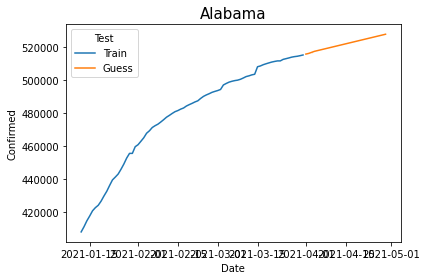

In [129]:
sns.lineplot(data=Alabama,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Alabama', fontsize=15)

Text(0.5, 1.0, 'Alabama, Deaths')

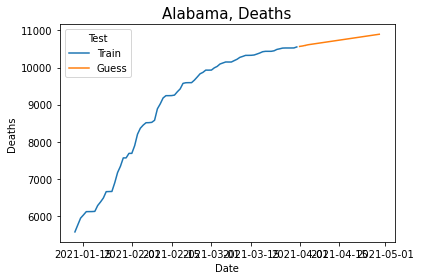

In [130]:
sns.lineplot(data=Alabama,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Alabama, Deaths', fontsize=15)

Text(0.5, 1.0, 'Alaska, Confirmed')

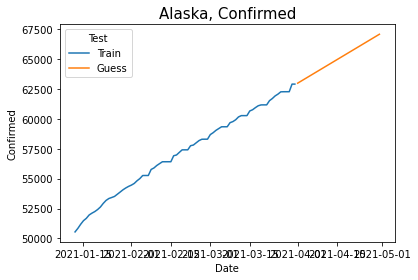

In [131]:
sns.lineplot(data=Alaska,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Alaska, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Alaska, Deaths')

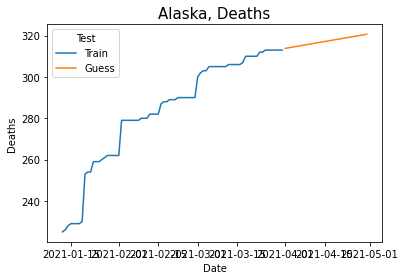

In [132]:
sns.lineplot(data=Alaska,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Alaska, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arizona, Confirmed')

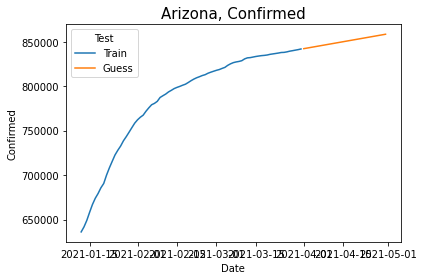

In [133]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Arizona, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Arizona, Deaths')

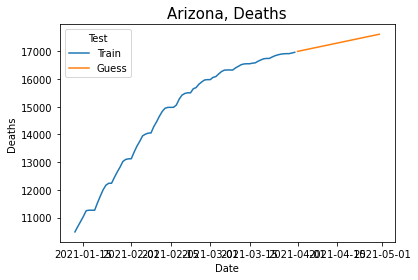

In [134]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arizona, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arkansas, Confirmed')

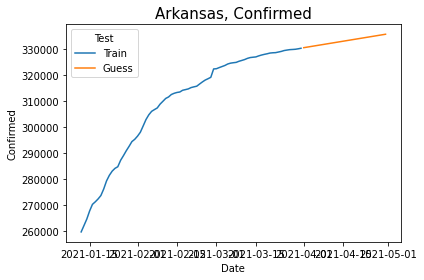

In [135]:
sns.lineplot(data=Arkansas,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Arkansas, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Arkansas, Deaths')

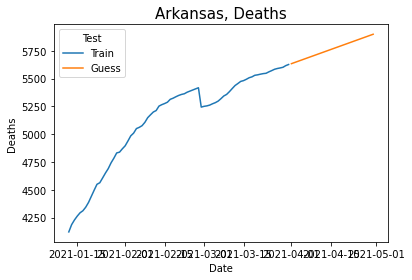

In [136]:
sns.lineplot(data=Arkansas,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arkansas, Deaths', fontsize=15)

Text(0.5, 1.0, 'Arizona, Deaths')

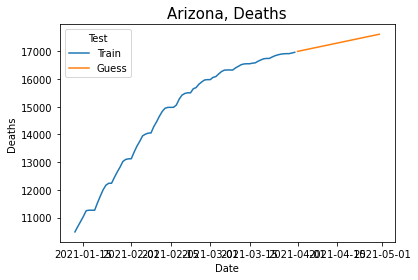

In [137]:
sns.lineplot(data=Arizona,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Arizona, Deaths', fontsize=15)

Text(0.5, 1.0, 'California, Confirmed')

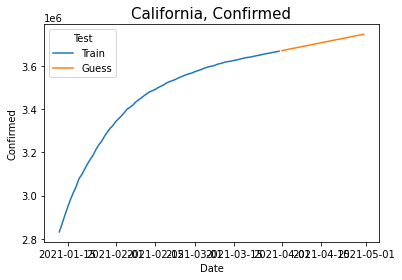

In [138]:
sns.lineplot(data=California,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('California, Confirmed', fontsize=15)

Exhibiting really weird patterns.

Text(0.5, 1.0, 'California, Deaths')

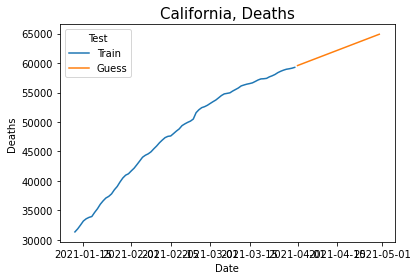

In [139]:
sns.lineplot(data=California,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('California, Deaths', fontsize
          =15)

Text(0.5, 1.0, 'Georgia, Confirmed')

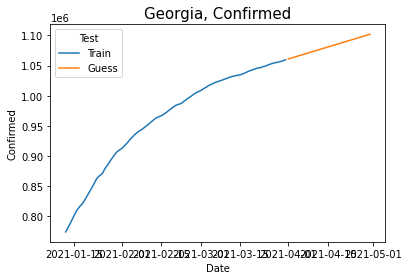

In [140]:
sns.lineplot(data=Georgia,
            x="Date",
            y="Confirmed",
            hue="Test")
plt.title('Georgia, Confirmed', fontsize=15)

Text(0.5, 1.0, 'Georgia, Deaths')

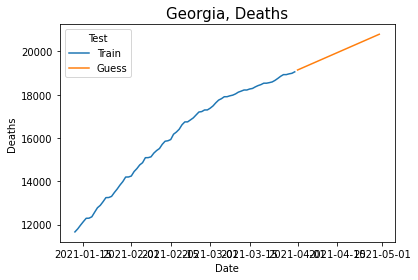

In [141]:
sns.lineplot(data=Georgia,
            x="Date",
            y="Deaths",
            hue="Test")
plt.title('Georgia, Deaths', fontsize=15)

You can create the graph for a given state by following the examples above.

Results look too straight